In [155]:

# !pip install fredapi -q
# !pip install plotly -q
# !pip install opendatasets --upgrade -q
# !pip install -U scikit-learn -q
# !pip install scipy -q
# !pip install joblib --upgrade
# # !pip install wordcloud -q

In [156]:
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
from fredapi import Fred
import plotly.express as px
import joblib
from wordcloud import WordCloud



In [157]:
import secret

https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data

In [158]:
dbg = True

In [159]:
#ONLY NEED TO RUN THIS ONCE
# data_url='https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
# od.download(data_url, force=True)

#note use username and key in slack chat

In [160]:
#mac version
import os
data_dir = r'./us-accidents'
os.listdir(data_dir)


['US_Accidents_March23.csv']

In [161]:
#windows version
# import os
# data_dir = r'./us-accidents'
# os.listdir(data_dir)

In [162]:

data_filename=data_dir+'/US_Accidents_March23.csv'

In [163]:
if dbg:
    car_crash_df=pd.read_csv(data_filename, nrows=200000)
else:
    car_crash_df=pd.read_csv(data_filename)


# Data Understanding

In [164]:
#pd.set_option('display.max_columns', None)
car_crash_df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [165]:
car_crash_df.tail(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
199995,A-200002,Source2,2,2017-01-12 06:12:42,2017-01-12 06:56:35,40.698299,-74.185783,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
199996,A-200003,Source2,3,2017-01-12 06:15:23,2017-01-12 06:45:04,40.667114,-73.995918,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Day,Day
199997,A-200004,Source2,2,2017-01-12 06:12:02,2017-01-12 06:41:39,40.801270,-73.929916,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
199998,A-200005,Source2,2,2017-01-12 06:09:29,2017-01-12 06:39:11,40.700081,-73.323242,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
199999,A-200006,Source2,2,2017-01-12 06:08:14,2017-01-12 06:38:05,42.516994,-71.142113,NaN,NaN,0.00,...,False,False,False,False,False,False,Night,Night,Day,Day


In [166]:
car_crash_df.shape

(200000, 46)

In [167]:
car_crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     200000 non-null  object 
 1   Source                 200000 non-null  object 
 2   Severity               200000 non-null  int64  
 3   Start_Time             200000 non-null  object 
 4   End_Time               200000 non-null  object 
 5   Start_Lat              200000 non-null  float64
 6   Start_Lng              200000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           200000 non-null  float64
 10  Description            200000 non-null  object 
 11  Street                 200000 non-null  object 
 12  City                   199986 non-null  object 
 13  County                 200000 non-null  object 
 14  State                  200000 non-nu

In [168]:
car_crash_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,200000.000000,200000.000000,200000.000000,0.0,0.0,200000.000000,197165.00000,21390.000000,196757.000000,197797.000000,196737.000000,161560.000000,18352.000000
mean,2.410060,35.402579,-104.355926,NaN,NaN,0.033965,65.68728,30.399621,63.903195,30.001038,9.281449,8.512051,0.057414
std,0.494724,4.582634,17.870632,NaN,NaN,0.535451,16.43741,19.850108,21.603255,0.271988,1.991511,6.313318,0.493516
min,1.000000,25.433098,-123.813927,NaN,NaN,0.000000,-13.00000,-29.300000,4.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.754379,-118.437279,NaN,NaN,0.000000,57.00000,19.200000,50.000000,29.910000,10.000000,5.000000,0.000000
50%,2.000000,34.120522,-117.370598,NaN,NaN,0.000000,66.90000,30.300000,66.000000,30.000000,10.000000,8.100000,0.000000
75%,3.000000,38.514824,-83.764334,NaN,NaN,0.010000,77.00000,38.800000,81.000000,30.100000,10.000000,10.400000,0.030000
max,4.000000,44.895218,-70.590034,NaN,NaN,80.890000,132.60000,111.000000,100.000000,33.040000,80.000000,822.800000,10.140000


In [169]:
car_crash_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [170]:
car_crash_df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

# Data Cleaning

In [171]:
missing_percentage = car_crash_df.isna().mean() * 100
missing_percentage

ID                         0.0000
Source                     0.0000
Severity                   0.0000
Start_Time                 0.0000
End_Time                   0.0000
Start_Lat                  0.0000
Start_Lng                  0.0000
End_Lat                  100.0000
End_Lng                  100.0000
Distance(mi)               0.0000
Description                0.0000
Street                     0.0000
City                       0.0070
County                     0.0000
State                      0.0000
Zipcode                    0.0150
Country                    0.0000
Timezone                   0.0150
Airport_Code               0.0150
Weather_Timestamp          0.7715
Temperature(F)             1.4175
Wind_Chill(F)             89.3050
Humidity(%)                1.6215
Pressure(in)               1.1015
Visibility(mi)             1.6315
Wind_Direction             0.7780
Wind_Speed(mph)           19.2200
Precipitation(in)         90.8240
Weather_Condition          1.3940
Amenity       

In [172]:
#dropping columns with more than 20% missing values
car_crash_df=car_crash_df.drop(columns=['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)'])


In [173]:
#Dropping columns not relevant to the analysis
car_crash_df=car_crash_df.drop(columns=['ID','Source','Airport_Code','Weather_Timestamp','Amenity','Give_Way','Junction','No_Exit','Railway','Station','Stop','Traffic_Calming','Turning_Loop','Timezone','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])  



In [174]:
car_crash_df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Bump', 'Crossing', 'Roundabout', 'Traffic_Signal',
       'Sunrise_Sunset'],
      dtype='object')

In [175]:
car_crash_df.drop_duplicates(inplace=True)

In [176]:
#adding a Year-Month Column for easier joins
car_crash_df['Year-Month'] = pd.to_datetime(car_crash_df['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.to_period('M')


In [177]:
print(car_crash_df['Year-Month'].isna().sum())
#dropping rows with missing Year-Month, will help notebook performance
car_crash_df= car_crash_df.dropna(subset=['Year-Month'])


0


In [178]:
#fixing index due to the rows we dropped
car_crash_df.reset_index(drop=True, inplace=True)

In [179]:
car_crash_df.shape

(199969, 26)

# Fred Api
## Gathering Population, Household Income (State and County level), Unemployment, and SNAP Dataframe!

In [180]:
#using our super secret key to acess fred api
fred = Fred(api_key=secret.fred_key)

### Population Data Gathering


In [181]:
# pop_search= fred.search('Resident Population')
# pop_search_filtered = pop_search[pop_search['id'].str.len() <= 5] #states all had an id of 5 characters or less
# pop_search_filtered.head(3)


In [182]:
# #putting 52 df's into a list and then forming population_df
# all_results=[]

# for myid in pop_search_filtered.index:
#     result=fred.get_series(myid) #get series is how we get data in fred Api
#     result=result.to_frame(name=myid)
#     all_results.append(result)
#     population_df=pd.concat(all_results, axis=1)

In [183]:
# #fixing column headings
# population_headings=pop_search_filtered['title'].to_dict()
# population_df.rename(columns=population_headings, inplace=True)

In [184]:

# Check if the cached file exists
try:
    population_df = joblib.load('cached_population_dataframe.joblib')
except FileNotFoundError:
  

    pop_search = fred.search('Resident Population')
    pop_search_filtered = pop_search[pop_search['id'].str.len() <= 5]

    all_results = []
    for myid in pop_search_filtered.index:
        result = fred.get_series(myid)
        result = result.to_frame(name=myid)
        all_results.append(result)
    population_df = pd.concat(all_results, axis=1)

    # Fixing column headings
    population_headings = pop_search_filtered['title'].to_dict()
    population_df.rename(columns=population_headings, inplace=True)

    # Save the DataFrame to a file
    joblib.dump(population_df, 'cached_population_dataframe.joblib')


population_df.head(3)


,Resident Population in California,Resident Population in Florida,Resident Population in Texas,Resident Population in New York,Resident Population in Alabama,Resident Population in Georgia,Resident Population in Ohio,Resident Population in Washington,Resident Population in Missouri,Resident Population in North Carolina,...,Resident Population in Kansas,Resident Population in New Hampshire,Resident Population in Iowa,Resident Population in New Mexico,Resident Population in Montana,Resident Population in Nebraska,Resident Population in Maine,Resident Population in North Dakota,Resident Population in Federal Reserve District 1: Boston,Resident Population in Federal Reserve District 9: Minneapolis
1900-01-01,1490.0,530.0,3055.0,7283.0,1830.0,2220.0,4161.0,523.0,3108.0,1897.0,...,1473.0,412.0,2231.0,196.0,245.0,1067.0,695.0,321.0,NaN,NaN
1901-01-01,1550.0,544.0,3132.0,7449.0,1907.0,2263.0,4216.0,583.0,3128.0,1926.0,...,1490.0,412.0,2227.0,206.0,261.0,1078.0,699.0,346.0,NaN,NaN
1902-01-01,1623.0,565.0,3210.0,7612.0,1935.0,2305.0,4322.0,651.0,3147.0,1956.0,...,1505.0,409.0,2222.0,218.0,270.0,1089.0,703.0,371.0,NaN,NaN


### Median Household Income Data Gathering

In [185]:
# #Median Household Income for each state
# socio_search=fred.search('median household income',filter=('units','Current%20Dollars')) #this is going to be for states, I will do for counties next, %20 is ascii for space
# socio_search_filtered_df = socio_search[socio_search['title'].str.contains('Median Household Income in', case=True)] # this is going to be for states, I will do for counties next


In [186]:
# med_results=[]

# for myid in socio_search_filtered_df.index:
#     result=fred.get_series(myid) #get series is how we get data in fred Api
#     result=result.to_frame(name=myid)
#     med_results.append(result)
#     states_mhhi_df=pd.concat(med_results, axis=1)

In [187]:
# title_dict = socio_search_filtered_df["title"].to_dict()
# title_dict

# states_mhhi_df.rename(columns=title_dict, inplace=True) #renaming columns to state names
# states_mhhi_df.head(3)

In [188]:
try:
    states_mhhi_df = joblib.load('cached_states_mhhi_df.joblib')
except FileNotFoundError:
    #Median Household Income for each state
    socio_search=fred.search('median household income',filter=('units','Current%20Dollars')) #this is going to be for states, I will do for counties next, %20 is ascii for space
    socio_search_filtered_df = socio_search[socio_search['title'].str.contains('Median Household Income in', case=True)] # this is going to be for states, I will do for counties next
    med_results=[]

    for myid in socio_search_filtered_df.index:
        result=fred.get_series(myid) #get series is how we get data in fred Api
        result=result.to_frame(name=myid)
        med_results.append(result)
        states_mhhi_df=pd.concat(med_results, axis=1)

    title_dict = socio_search_filtered_df["title"].to_dict()
    title_dict

    states_mhhi_df.rename(columns=title_dict, inplace=True) #renaming columns to state names
    
    # Save the DataFrame to a file
    joblib.dump(states_mhhi_df, 'cached_states_mhhi_df.joblib')
states_mhhi_df.head(3)


,Median Household Income in the United States,Median Household Income in California,Median Household Income in Massachusetts,Median Household Income in Texas,Median Household Income in North Carolina,Median Household Income in Tennessee,Median Household Income in Alabama,Median Household Income in Wisconsin,Median Household Income in New York,Median Household Income in Connecticut,...,Median Household Income in Nebraska,Median Household Income in South Dakota,Median Household Income in Mississippi,Median Household Income in Wyoming,Median Household Income in New Mexico,Median Household Income in District of Columbia,Median Household Income in West Virginia,Median Household Income in Delaware,Median Household Income in Hawaii,Median Household Income in Arkansas
1984-01-01,22420.0,25290.0,26960.0,23020.0,20570.0,16780.0,17310.0,20740.0,22030.0,29950.0,...,21400.0,19410.0,15430.0,23820.0,20630.0,20410.0,16840.0,25820.0,28880.0,15670.0
1985-01-01,23620.0,26980.0,28210.0,23740.0,21450.0,17780.0,18330.0,23250.0,23640.0,31090.0,...,21800.0,18140.0,16410.0,22080.0,20420.0,21080.0,15980.0,22980.0,28960.0,17450.0
1986-01-01,24900.0,29010.0,30340.0,24160.0,21860.0,18260.0,19130.0,26430.0,25030.0,32720.0,...,21770.0,19900.0,16510.0,23560.0,19850.0,24320.0,16460.0,25630.0,29000.0,18730.0


#### Median Household Income per County

In [189]:
# countyHHI=fred.search('median household income') 
# countyHHI_filtered= countyHHI[countyHHI['title'].str.contains('Estimate of Median Household Income', case=True)]
# countyHHI_filtered.head(3)

In [190]:
#fitering out data we dont want (90% confidence interval estimate)
# bad_data=countyHHI_filtered.loc[countyHHI_filtered['title'].str.contains('90%')]
# bad_data['title'].to_dict()

In [191]:

# countyHHI_filtered.drop(bad_data.index, inplace=True)


In [192]:
# takes 43 minutes 20 seconds to run
# county_results=[]

# for myid in countyHHI_filtered.index:
#     import time

#     retries = 0
#     max_retries = 5

#     while retries < max_retries:
#         try:
#             # Make API request here
#             result = fred.get_series(myid)
#             result = result.to_frame(name=myid)
#             county_results.append(result)
#             scountyHHI_filtered_df = pd.concat(county_results, axis=1)
#             time.sleep(3)
#             break  # If successful, exit the loop
#         except RateLimitError:  # Replace with the actual exception type
#             retries += 1
#             delay = 2**retries  # Exponential backoff
#             time.sleep(delay)


In [193]:
# county_series=countyHHI_filtered.index.to_list()

# socio_title = countyHHI_filtered["title"].to_dict()

# scountyHHI_filtered_df.rename(columns=socio_title, inplace=True) #renaming columns to county names
#scounty.to_csv('your_data.csv', index=True)

In [194]:
#made it a csv file after running once previously
county_HHI_df=pd.read_csv('HHIcounty')
county_HHI_df.head(3)

,Unnamed: 0,"Estimate of Median Household Income for Los Angeles County, CA","Estimate of Median Household Income for San Diego County, CA","Estimate of Median Household Income for San Francisco County/City, CA","Estimate of Median Household Income for Orange County, CA","Estimate of Median Household Income for Denver County, CO","Estimate of Median Household Income for Miami-Dade County, FL","Estimate of Median Household Income for Dallas County, TX","Estimate of Median Household Income for Santa Clara County, CA","Estimate of Median Household Income for Fairfax County, VA",...,"Estimate of Median Household Income for Grant County, WA","Estimate of Median Household Income for Hunt County, TX","Estimate of Median Household Income for Clark County, OH","Estimate of Median Household Income for Flathead County, MT","Estimate of Median Household Income for Ford County, IL","Estimate of Median Household Income for Castro County, TX","Estimate of Median Household Income for Iron County, UT","Estimate of Median Household Income for Liberty County, GA","Estimate of Median Household Income for Hamblen County, TN","Estimate of Median Household Income for Kent County, DE"
0,1989-01-01,31123.0,31627.0,30166.0,39592.0,24845.0,NaN,30570.0,44316.0,NaN,...,23797.0,24333.0,27226.0,23502.0,25801.0,24833.0,23682.0,19953.0,23841.0,27452.0
1,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Gathering Unemployment Data


In [195]:
# unemployment_data=fred.search('unemployment rate monthly',filter=('seasonal_adjustment','Not%20Seasonally%20Adjusted'))
# unemployment_data=unemployment_data.query("frequency=='Monthly' and units=='Percent'")
# unemployment_data= unemployment_data[unemployment_data['id'].str.len() <= 5]
# unemployment_data.shape

In [196]:
# unem_results=[]

# for myid in unemployment_data.index:
#     result=fred.get_series(myid) #get series is how we get data in fred Api
#     result=result.to_frame(name=myid)
#     unem_results.append(result)
#     unemployment_df_state=pd.concat(unem_results, axis=1)


# title_dict = unemployment_data["title"].to_dict()


# unemployment_df_state.rename(columns=title_dict, inplace=True) #renaming columns to state names
# unemployment_df_state

In [197]:
#Getting total unemployment data for the US Not Seasonally Adjusted
# fred.search('UNRATENSA')
# non_sa_unem=fred.get_series('UNRATENSA')
# usa_unemployment=non_sa_unem.to_frame(name='US Unemployment Rate Not Seasonally Adjusted')
# usa_unemployment




In [198]:
#merging US unemployment data with state unemployment data
# unem_df=pd.merge(unemployment_df_state, usa_unemployment, left_index=True, right_index=True)
# unem_df.head(3)

In [199]:
# Check if the cached file exists
try:
    unem_df = joblib.load('cached_unemployment_dataframe.joblib')
except FileNotFoundError:
    unemployment_data = fred.search('unemployment rate monthly', filter=('seasonal_adjustment', 'Not%20Seasonally%20Adjusted'))
    unemployment_data = unemployment_data.query("frequency=='Monthly' and units=='Percent'")
    unemployment_data = unemployment_data[unemployment_data['id'].str.len() <= 5]

    unem_results = []
    for myid in unemployment_data.index:
        result = fred.get_series(myid)
        result = result.to_frame(name=myid)
        unem_results.append(result)
    unemployment_df_state = pd.concat(unem_results, axis=1)

    title_dict = unemployment_data["title"].to_dict()
    unemployment_df_state.rename(columns=title_dict, inplace=True)

    fred.search('UNRATENSA')
    non_sa_unem = fred.get_series('UNRATENSA')
    usa_unemployment = non_sa_unem.to_frame(name='US Unemployment Rate Not Seasonally Adjusted')

    unem_df = pd.merge(unemployment_df_state, usa_unemployment, left_index=True, right_index=True)

    # Save the DataFrame to a file
    joblib.dump(unem_df, 'cached_unemployment_dataframe.joblib')


unem_df.head(3)

,Unemployment Rate in California,Unemployment Rate in New York,Unemployment Rate in Texas,Unemployment Rate in Florida,Unemployment Rate in Ohio,Unemployment Rate in Michigan,Unemployment Rate in Alabama,Unemployment Rate in Illinois,Unemployment Rate in Georgia,Unemployment Rate in New Jersey,...,Unemployment Rate in Wyoming,Unemployment Rate in Delaware,Unemployment Rate in New Hampshire,Unemployment Rate in Nebraska,Unemployment Rate in Maine,Unemployment Rate in South Dakota,Unemployment Rate in Rhode Island,Unemployment Rate in Mississippi,Unemployment Rate in Vermont,US Unemployment Rate Not Seasonally Adjusted
1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2
1970-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.7
1970-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6


In [200]:
#Gathering Food Stamp Data reciepients, SNAP


try:
    snap_df = joblib.load('cached_snap_dataframe.joblib')
except FileNotFoundError:
    snap_data=fred.search('Number of Food Stamp Recipients',filter=('frequency','Monthly'))
    snap_results=[]

    for my_id in snap_data.index:
        result=fred.get_series(my_id)
        result=result.to_frame(name=my_id)
        snap_results.append(result)
        snap_df=pd.concat(snap_results, axis=1)
        
        
    title_dict = snap_data["title"].to_dict()
    snap_df.rename(columns=title_dict, inplace=True)
    # Save the DataFrame to a file
    joblib.dump(snap_df, 'cached_snap_dataframe.joblib')
    
snap_df.head(3)


,SNAP Benefits Recipients in North Carolina,SNAP Benefits Recipients in Massachusetts,SNAP Benefits Recipients in Washington,SNAP Benefits Recipients in Missouri,SNAP Benefits Recipients in Minnesota,SNAP Benefits Recipients in Arizona,SNAP Benefits Recipients in Oregon,SNAP Benefits Recipients in Florida,SNAP Benefits Recipients in California,SNAP Benefits Recipients in Arkansas,...,SNAP Benefits Recipients in Nevada,SNAP Benefits Recipients in Oklahoma,SNAP Benefits Recipients in West Virginia,SNAP Benefits Recipients in New Hampshire,SNAP Benefits Recipients in South Dakota,SNAP Benefits Recipients in North Dakota,SNAP Benefits Recipients in District of Columbia,SNAP Benefits Recipients in Wisconsin,SNAP Benefits Recipients in New Jersey,SNAP Benefits Recipients in New York
1981-01-01,616211.0,443895.0,279582.0,379458.0,202721.0,202374.0,232386.0,970682.0,1597227.0,309533.0,...,40864.0,214167.0,235425.0,55281.0,46553.0,29029.0,100676.0,266534.0,597246.0,1848173.0
1981-02-01,635802.0,449710.0,281619.0,387161.0,208269.0,204786.0,239128.0,967855.0,1615981.0,315038.0,...,41206.0,215338.0,237481.0,57026.0,47074.0,29970.0,102682.0,271321.0,609680.0,1857375.0
1981-03-01,641269.0,453040.0,282814.0,392795.0,210445.0,212398.0,245018.0,978580.0,1645020.0,316420.0,...,40665.0,212761.0,241737.0,57945.0,46823.0,30645.0,103611.0,278400.0,575615.0,1899966.0


## Fred Data Cleaning 

In [201]:
#filting data to only include 2016-2022 and making a date column
population_df.reset_index(inplace=True)
population_df = population_df[population_df['index'].dt.year >= 2016]
population_df.rename(columns={'index':'Date'}, inplace=True)
population_df.reset_index(drop=True,inplace=True)

population_df.head(3)

,Date,Resident Population in California,Resident Population in Florida,Resident Population in Texas,Resident Population in New York,Resident Population in Alabama,Resident Population in Georgia,Resident Population in Ohio,Resident Population in Washington,Resident Population in Missouri,...,Resident Population in Kansas,Resident Population in New Hampshire,Resident Population in Iowa,Resident Population in New Mexico,Resident Population in Montana,Resident Population in Nebraska,Resident Population in Maine,Resident Population in North Dakota,Resident Population in Federal Reserve District 1: Boston,Resident Population in Federal Reserve District 9: Minneapolis
0,2016-01-01,39149.186,20627.237,27914.064,19636.391,4866.824,10308.442,11640.060,7299.961,6091.384,...,2912.977,1343.694,3133.210,2092.555,1042.137,1906.483,1332.348,756.114,13820.238,9344.801
1,2017-01-01,39337.785,20977.089,28291.024,19593.849,4877.989,10417.031,11665.706,7427.951,6111.382,...,2910.892,1350.395,3143.734,2092.844,1053.862,1916.998,1335.743,756.755,13862.601,9413.475
2,2018-01-01,39437.463,21254.926,28624.564,19544.098,4891.628,10519.389,11680.892,7526.793,6125.986,...,2912.748,1355.064,3149.900,2093.754,1061.818,1925.512,1340.123,760.062,13894.097,9472.449


# County Household Income

In [202]:
county_HHI_df.rename(columns={'Unnamed: 0':'Date'}, inplace=True) 
county_HHI_df["Date"] = pd.to_datetime(county_HHI_df["Date"])
county_HHI_df = county_HHI_df[county_HHI_df['Date'].dt.year >= 2016]
county_HHI_df.reset_index(drop=True,inplace=True)

In [203]:
#cleaned county_HHI_df
county_HHI_df.copy().head(3)

,Date,"Estimate of Median Household Income for Los Angeles County, CA","Estimate of Median Household Income for San Diego County, CA","Estimate of Median Household Income for San Francisco County/City, CA","Estimate of Median Household Income for Orange County, CA","Estimate of Median Household Income for Denver County, CO","Estimate of Median Household Income for Miami-Dade County, FL","Estimate of Median Household Income for Dallas County, TX","Estimate of Median Household Income for Santa Clara County, CA","Estimate of Median Household Income for Fairfax County, VA",...,"Estimate of Median Household Income for Grant County, WA","Estimate of Median Household Income for Hunt County, TX","Estimate of Median Household Income for Clark County, OH","Estimate of Median Household Income for Flathead County, MT","Estimate of Median Household Income for Ford County, IL","Estimate of Median Household Income for Castro County, TX","Estimate of Median Household Income for Iron County, UT","Estimate of Median Household Income for Liberty County, GA","Estimate of Median Household Income for Hamblen County, TN","Estimate of Median Household Income for Kent County, DE"
0,2016-01-01,61308.0,70693.0,101873.0,81642.0,61038.0,45886.0,54429.0,110843.0,115518.0,...,48997.0,51827.0,47410.0,50249.0,51861.0,45229.0,45581.0,44154.0,42047.0,53994.0
1,2017-01-01,64912.0,76048.0,109601.0,86031.0,64974.0,49758.0,56732.0,118468.0,117989.0,...,55807.0,53421.0,47654.0,57389.0,55356.0,41746.0,48168.0,45655.0,44181.0,57112.0
2,2018-01-01,67986.0,78777.0,110601.0,89373.0,68069.0,52043.0,59838.0,125933.0,122035.0,...,53688.0,53360.0,50089.0,54382.0,55357.0,45689.0,51393.0,47685.0,44040.0,54980.0


### Unemployment

In [204]:
unem_df.reset_index(inplace=True)
unem_df = unem_df[unem_df['index'].dt.year >= 2016]
unem_df.rename(columns={'index':'Date'}, inplace=True)
unem_df.reset_index(inplace=True)
unem_df.drop('index', axis=1, inplace=True)

In [205]:
unem_df

,Date,Unemployment Rate in California,Unemployment Rate in New York,Unemployment Rate in Texas,Unemployment Rate in Florida,Unemployment Rate in Ohio,Unemployment Rate in Michigan,Unemployment Rate in Alabama,Unemployment Rate in Illinois,Unemployment Rate in Georgia,...,Unemployment Rate in Wyoming,Unemployment Rate in Delaware,Unemployment Rate in New Hampshire,Unemployment Rate in Nebraska,Unemployment Rate in Maine,Unemployment Rate in South Dakota,Unemployment Rate in Rhode Island,Unemployment Rate in Mississippi,Unemployment Rate in Vermont,US Unemployment Rate Not Seasonally Adjusted
0,2016-01-01,5.9,5.2,4.5,5.2,5.7,5.3,6.5,6.8,5.8,...,5.8,4.9,3.3,3.3,4.7,3.2,6.2,6.4,3.8,5.3
1,2016-02-01,5.8,5.3,4.4,4.8,5.6,5.3,6.3,6.7,5.7,...,5.7,4.7,3.3,3.2,4.7,3.4,6.1,6.0,3.5,5.2
2,2016-03-01,5.9,5.1,4.5,4.8,5.3,5.4,6.1,6.5,5.5,...,6.0,4.6,3.2,3.2,4.5,3.2,5.8,5.8,3.5,5.1
3,2016-04-01,5.4,4.6,4.3,4.7,4.8,4.7,5.4,6.0,5.2,...,6.1,4.3,2.9,3.0,4.0,3.0,5.1,5.4,3.3,4.7
4,2016-05-01,5.0,4.4,4.3,4.6,4.6,4.6,5.4,5.4,5.1,...,5.6,4.0,2.7,2.8,3.6,2.7,5.0,6.0,2.9,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2023-06-01,4.9,4.2,4.2,3.0,3.8,4.1,2.7,4.5,3.5,...,2.9,4.4,1.8,2.5,2.5,2.0,3.0,4.0,2.1,3.8
90,2023-07-01,4.8,4.1,4.5,3.1,3.4,4.3,2.3,4.5,3.3,...,2.8,4.3,1.9,2.3,2.5,1.7,2.4,4.0,1.8,3.8
91,2023-08-01,5.1,4.4,4.5,3.1,3.7,4.2,2.4,5.3,3.8,...,2.7,4.6,2.3,1.9,2.5,2.0,3.1,3.9,2.2,3.9
92,2023-09-01,4.9,4.0,4.1,3.0,3.5,3.9,2.4,4.9,3.4,...,2.5,4.1,2.4,2.0,2.5,1.7,2.3,3.1,2.0,3.6


In [206]:
missing_values = unem_df.loc[:, unem_df.isna().any()]
print(missing_values)

    Unemployment Rate in Puerto Rico
0                               11.1
1                               11.6
2                               12.2
3                               11.4
4                               11.2
..                               ...
89                               6.2
90                               6.8
91                               6.1
92                               5.6
93                               5.5

[94 rows x 1 columns]


In [207]:
#dropping puerto rico because it has a lot of missing values
unem_df.drop(columns=['Unemployment Rate in Puerto Rico'], inplace=True)


In [208]:
unem_df['Year-Month']=pd.to_datetime(unem_df['Date']).dt.to_period('M')

In [209]:
unem_df['Year-Month']

0     2016-01
1     2016-02
2     2016-03
3     2016-04
4     2016-05
       ...   
89    2023-06
90    2023-07
91    2023-08
92    2023-09
93    2023-10
Name: Year-Month, Length: 94, dtype: period[M]

In [210]:
#unemployment data is cleaned now for our purposes
c_unem_df=unem_df.copy()


### Supplemental Nutrition Assistance Program (SNAP) Cleaning

In [211]:
#filting data to only include 2016-2022 and makeing a date column
snap_df.reset_index(inplace=True)
snap_df = snap_df[snap_df['index'].dt.year >= 2016]
snap_df.rename(columns={'index':'Date'}, inplace=True)
snap_df.reset_index(drop=True,inplace=True)

snap_df.head(3)

,Date,SNAP Benefits Recipients in North Carolina,SNAP Benefits Recipients in Massachusetts,SNAP Benefits Recipients in Washington,SNAP Benefits Recipients in Missouri,SNAP Benefits Recipients in Minnesota,SNAP Benefits Recipients in Arizona,SNAP Benefits Recipients in Oregon,SNAP Benefits Recipients in Florida,SNAP Benefits Recipients in California,...,SNAP Benefits Recipients in Nevada,SNAP Benefits Recipients in Oklahoma,SNAP Benefits Recipients in West Virginia,SNAP Benefits Recipients in New Hampshire,SNAP Benefits Recipients in South Dakota,SNAP Benefits Recipients in North Dakota,SNAP Benefits Recipients in District of Columbia,SNAP Benefits Recipients in Wisconsin,SNAP Benefits Recipients in New Jersey,SNAP Benefits Recipients in New York
0,2016-01-01,1605908.0,787411.0,1036827.0,838186.0,483198.0,965233.0,748370.0,3664055.0,4384491.0,...,439141.0,611426.0,357398.0,99972.0,96917.0,54125.0,135796.0,731541.0,888259.0,2975036.0
1,2016-02-01,1602407.0,784324.0,1036086.0,832459.0,480628.0,952360.0,744664.0,3560168.0,4354226.0,...,438469.0,608588.0,358961.0,99450.0,96091.0,54395.0,134520.0,734860.0,884714.0,2972012.0
2,2016-03-01,1598845.0,782988.0,1029246.0,830045.0,482901.0,946247.0,739514.0,3560060.0,4378063.0,...,438356.0,608305.0,358559.0,99485.0,95646.0,54526.0,133804.0,726309.0,885831.0,2972806.0


# Car Accidents Within the United States

Research Questions

1. Geographic Factors:
What are known hotspot locations for highway accidents?
Which States had the most traffic accidents, and was this influenced more by population size of the State or weather patterns or by some other unknown factor?
2. Temporal Factors:
Since the data was collected between 2016-2023, what impact did Covid-19 have on traffic accidents?
Did holidays or certain days/seasons lead to more accidents?
Which years have car accidents seemed to improve or decrease in percentage?
3. Vehicle-Related Factors:
Are certain car manufacturers involved in more accidents than others?
Have car accidents decreased since 2016, with the increase of technology and car manufacturing safety?
Have car accident casualties decreased since 2016 with the increase in car manufacturing safety?
4. Socioeconomic and Demographic Factors:
Do various areas with low socioeconomic status and income affect car accidents in any way? (correlation between the amount or severity of accidents and income/demographics)
FRED API - did unemployment have a positive or negative correlation with car accidents?
5. Severity and Types of Accidents:
What types or severity of accidents were most common?
6. Regional Improvements:
Which areas have improved the most since 2016 at decreasing the rate of car accidents?

In [212]:
# interactive_graph=px.scatter_mapbox(car_crash_df,
#                     lat="Start_Lat",
#                     lon="Start_Lng",
#                     color="Severity",
#                     zoom=3,
#                     hover_name="City",
#                     hover_data=["State","Temperature(F)","Humidity(%)","Pressure(in)","Visibility(mi)"],
#                     title="US Accidents Map")
                       
# interactive_graph.update_layout(mapbox_style="open-street-map")
# interactive_graph.show()

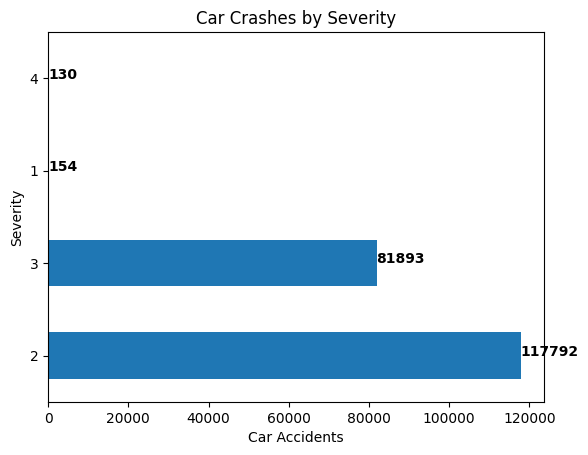

In [213]:
#5. Severity and Types of Accidents:
#What types or severity of accidents were most common?

import matplotlib.pyplot as plt

severity_counts = car_crash_df['Severity'].value_counts()

ax = severity_counts.plot(kind='barh')

for i, v in enumerate(severity_counts):
    ax.text(v + 10, i, str(v), color='black', fontweight='bold')


plt.xlabel('Car Accidents')
plt.ylabel('Severity')
plt.title('Car Crashes by Severity')

plt.show()


In [214]:
car_crash_df['Severity'].value_counts() 

Severity
2    117792
3     81893
1       154
4       130
Name: count, dtype: int64

In [215]:
#to do
#1 group by location using knn, population, weather patterns
#Question 3 ANSWER: have car accidented decreased over time?,
#Question 4 ANSWER: #get unemployment data, median household income
#6 look at years as a whole, pick certaint counties/states/zip codes to look at indivudlalyl and highlight the changes 

Text(0.5, 1.0, 'Car Crashes by State')

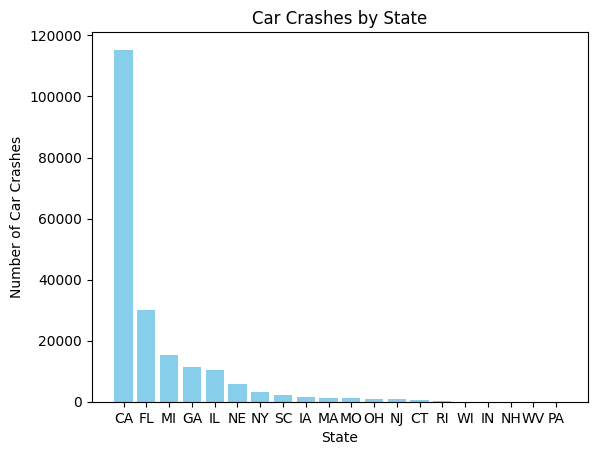

In [216]:
state_counts = car_crash_df['State'].value_counts()
plt.bar(state_counts.index, state_counts.values, color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Car Crashes')
plt.title('Car Crashes by State')


In [217]:
# state_counts = car_crash_df['State'].value_counts().reset_index()
# state_counts.columns = ['State', 'Number of Car Crashes']
# fig = px.bar(state_counts, x='State', y='Number of Car Crashes', title='Car Crashes by State',
#              labels={'Number of Car Crashes': 'Number of Car Crashes'})
# fig.show()

In [218]:
# import pandas as pd
# import plotly.express as px

# filtered_df = car_crash_df[car_crash_df['Severity'].isin([3, 4])]
# state_counts = filtered_df['State'].value_counts().reset_index(name='Number of Car Crashes')
# fig = px.bar(state_counts, x='State', y='Number of Car Crashes',
#              title='Car Crashes by State for Severity 3 and 4',
#              labels={'State': 'State', 'Number of Car Crashes': 'Number of Car Crashes'})
# fig.show()


In [219]:
# Deep dive into California heat map, showing concentration of accidents within the State
# california_df = car_crash_df[car_crash_df['State'] == 'CA']
# px.set_mapbox_access_token('your_mapbox_token')
# heat_map_concentration = px.density_mapbox(california_df,
#                               lat='Start_Lat',
#                               lon='Start_Lng', # or we can do quanitity of crashes within that area or zip code
#                               radius=10, 
#                               zoom=6, 
#                               mapbox_style='open-street-map',
#                               title='Interactive Heat Map of Car Accidents in California',
#                               hover_name='City',
#                               hover_data=["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)"])

# # Show the heat map
# heat_map_concentration.show()



In [220]:
california_df = car_crash_df[car_crash_df['State'] == 'CA'].copy()
california_df['Crashes_In_Zip'] = california_df.groupby('Zipcode')['Zipcode'].transform('count')
california_df[['Zipcode', 'Crashes_In_Zip']]

,Zipcode,Crashes_In_Zip
728,94591,197.0
729,94544,257.0
730,94595,30.0
731,95014,202.0
732,95118,89.0
...,...,...
116040,92780,373.0
116041,92808,256.0
116042,90640,162.0
116043,90606,437.0


In [221]:
#How do i show number of car crashes per capita of population.
# Can we add a column called population which shows the current population of each state?

population_df["Resident Population in California"]


0    39149.186
1    39337.785
2    39437.463
3    39437.610
4    39501.653
5    39142.991
6    39029.342
Name: Resident Population in California, dtype: float64

In [222]:
## we can use this to create a chart showing accidents per month by year to see the impacts during covid 

crash_date_df = car_crash_df
startend = crash_date_df[['Severity','Start_Time', 'End_Time']]
startend['Start_Time'] = pd.to_datetime(startend['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
startend['newtime'] = startend['Start_Time'].dt.to_period('M').astype(str)
startend

C:\Users\jkolo\AppData\Local\Temp\ipykernel_1244\2016331342.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jkolo\AppData\Local\Temp\ipykernel_1244\2016331342.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Severity,Start_Time,End_Time,newtime
0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,2016-02
1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,2016-02
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,2016-02
3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,2016-02
4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,2016-02
...,...,...,...,...
199964,2,2017-01-12 06:12:42,2017-01-12 06:56:35,2017-01
199965,3,2017-01-12 06:15:23,2017-01-12 06:45:04,2017-01
199966,2,2017-01-12 06:12:02,2017-01-12 06:41:39,2017-01
199967,2,2017-01-12 06:09:29,2017-01-12 06:39:11,2017-01


In [223]:
##this creates seperate colums for year and month
startend['year'] = startend['Start_Time'].dt.year
startend['month'] = startend['Start_Time'].dt.month
startend.head(4)

C:\Users\jkolo\AppData\Local\Temp\ipykernel_1244\3072269863.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jkolo\AppData\Local\Temp\ipykernel_1244\3072269863.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Severity,Start_Time,End_Time,newtime,year,month
0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,2016-02,2016,2
1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,2016-02,2016,2
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,2016-02,2016,2
3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,2016-02,2016,2


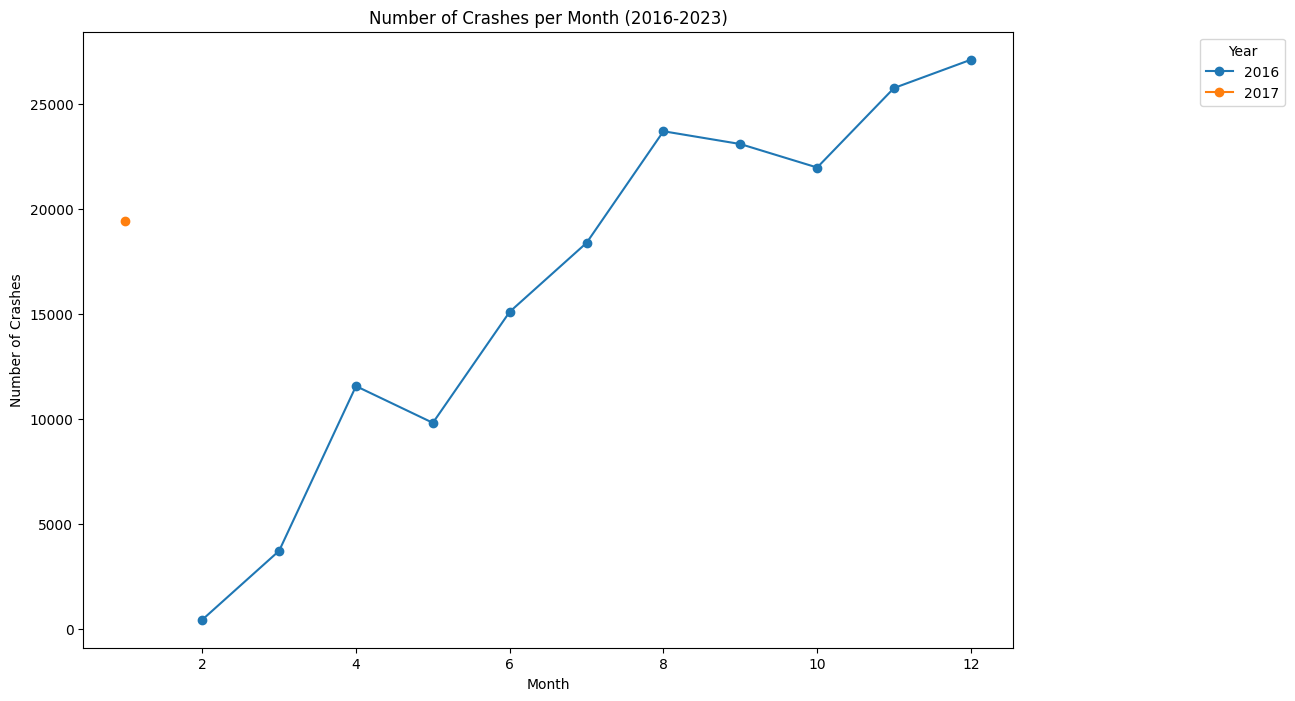

In [224]:
crashes_per_month = startend.groupby(['year', 'month']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))

for year in crashes_per_month['year'].unique():
    data_year = crashes_per_month[crashes_per_month['year'] == year]
    plt.plot(data_year['month'], data_year['count'], label=str(year), marker='o', linestyle='-')

plt.title('Number of Crashes per Month (2016-2023)')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

#this version of code makes it interactive
# fig = px.line(crashes_per_month, x='month', y='count', color='year', markers=True,
#                labels={'count': 'Number of Crashes', 'month': 'Month', 'year': 'Year'},
#                title='Number of Crashes per Month (2016-2023)')

# fig.show()


In [225]:
def map_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

startend['season'] = startend['month'].apply(map_to_season)
startend.tail()

C:\Users\jkolo\AppData\Local\Temp\ipykernel_1244\2085907798.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Severity,Start_Time,End_Time,newtime,year,month,season
199964,2,2017-01-12 06:12:42,2017-01-12 06:56:35,2017-01,2017,1,Winter
199965,3,2017-01-12 06:15:23,2017-01-12 06:45:04,2017-01,2017,1,Winter
199966,2,2017-01-12 06:12:02,2017-01-12 06:41:39,2017-01,2017,1,Winter
199967,2,2017-01-12 06:09:29,2017-01-12 06:39:11,2017-01,2017,1,Winter
199968,2,2017-01-12 06:08:14,2017-01-12 06:38:05,2017-01,2017,1,Winter


In [226]:
severity_by_season = startend.groupby('season')['Severity'].mean()
severity_by_season

season
Fall      2.401011
Spring    2.426405
Summer    2.415304
Winter    2.408589
Name: Severity, dtype: float64

In [227]:
#did they improve or get worse over time
#highlight specific months 

In [228]:
#thoughts

#use Knn imputation for data >1, average for data <1
#explore metadata, maybe drop columns too help with run time
#graphs showing car accidents overtime
#clean sunrise_sunset column


In [229]:
#to do
#1  population, weather patterns
#Question 3 ANSWER: have car accidents decreased over time?,
#Question 4 ANSWER: #get unemployment data, median household income
#6 look at years as a whole, pick certaint counties/states/zip codes to look at indivudlalyl and highlight the changes 

# 4. Socioeconomic and Demographic Factors:
Do various areas with low socioeconomic status and income affect car accidents in any way? (correlation between the amount or severity of accidents and income/demographics) FRED API - did unemployment have a positive or negative correlation with car accidents?

In [230]:
#calculating correlation between unemployment and car crashes

# merged_df = pd.merge(c_unem_df, car_crash_df, on='Year-Month', how='inner')
# merged_df

In [231]:
#Did unemployment have a positive or negative correlation with car accidents?
# merged_df.columns

In [232]:
#merged_df = pd.merge(unemployment_df, car_crash_df, on='date', how='inner')

In [233]:
#Do various areas with low socioeconomic status and income affect car accidents in any way? (correlation between the amount or severity of accidents and income/demographics)

## Car Crash's and SNAP Socioeconomic analysis

In [234]:
# Uniformly fill resident population data for each month for the given years data
start_date = pd.to_datetime('2016-01-01')
end_date = pd.to_datetime('2022-01-01')

monthly_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
population_df.set_index('Date', inplace=True)
expanded_df = population_df.reindex(monthly_dates)
expanded_df.ffill(inplace=True)


#making date column for expanded_df
expanded_df.reset_index(inplace=True)
expanded_df.rename(columns={'index':'Date'}, inplace=True)


In [235]:
#since FRED API measures Population in thousands, we need to multiply by 1000 to get the actual population

expanded_df.loc[:, expanded_df.columns != 'Date'] *= 1000
expanded_df.loc[:, expanded_df.columns != 'Date'] = expanded_df.loc[:, expanded_df.columns != 'Date'].round(0).astype(int)


In [236]:
#Droping columns not needed for analysis in both df's
expanded_df.drop(columns=['Resident Population in Federal Reserve District 1: Boston','Resident Population in Federal Reserve District 9: Minneapolis'], inplace=True)
snap_df.drop("SNAP Benefits Recipients in District of Columbia",axis=1, inplace=True)
expanded_df.drop("Resident Population in the District of Columbia", axis=1, inplace=True)

In [237]:
snap_df.shape

(78, 51)

In [238]:
#merging snap data with population data
snap_with_pop=pd.merge(snap_df, expanded_df, on='Date', how='inner')
snap_with_pop.tail(3)
#snap_with_pop['California SNAP Beneifts Per 100,000'] = (snap_with_pop['SNAP Benefits Recipients in California'] / snap_with_pop['Resident Population in California']) * 100000

# snap_with_pop.str.contains('California')
#normalizing snap data




,Date,SNAP Benefits Recipients in North Carolina,SNAP Benefits Recipients in Massachusetts,SNAP Benefits Recipients in Washington,SNAP Benefits Recipients in Missouri,SNAP Benefits Recipients in Minnesota,SNAP Benefits Recipients in Arizona,SNAP Benefits Recipients in Oregon,SNAP Benefits Recipients in Florida,SNAP Benefits Recipients in California,...,Resident Population in West Virginia,Resident Population in Delaware,Resident Population in Kansas,Resident Population in New Hampshire,Resident Population in Iowa,Resident Population in New Mexico,Resident Population in Montana,Resident Population in Nebraska,Resident Population in Maine,Resident Population in North Dakota
70,2021-11-01,1700709.0,988831.0,841721.0,661436.0,430741.0,770978.0,644999.0,2974930.0,4528129.0,...,1785526.0,1004807.0,2937922.0,1387505.0,3197689.0,2116677.0,1106227.0,1963554.0,1377238.0,777934.0
71,2021-12-01,1720044.0,996444.0,841737.0,656356.0,423724.0,781094.0,652384.0,2903034.0,4465861.0,...,1785526.0,1004807.0,2937922.0,1387505.0,3197689.0,2116677.0,1106227.0,1963554.0,1377238.0,777934.0
72,2022-01-01,1732124.0,1009432.0,848620.0,641804.0,428739.0,781330.0,704121.0,2791040.0,4470515.0,...,1775156.0,1018396.0,2937150.0,1395231.0,3200517.0,2113344.0,1122867.0,1967923.0,1385340.0,779261.0


In [239]:
state_lst = expanded_df.columns.str.split(' ')
state_lst = state_lst[1:] #removing Date from my state_lst

state_lst = [state[3] if len(state) < 4 else state[3:5] for state in state_lst] #extracting state name for 4 columns

state_lst

[['California'],
 ['Florida'],
 ['Texas'],
 ['New', 'York'],
 ['Alabama'],
 ['Georgia'],
 ['Ohio'],
 ['Washington'],
 ['Missouri'],
 ['North', 'Carolina'],
 ['Tennessee'],
 ['Michigan'],
 ['Colorado'],
 ['Arizona'],
 ['Indiana'],
 ['Illinois'],
 ['Oregon'],
 ['Connecticut'],
 ['Louisiana'],
 ['Utah'],
 ['Pennsylvania'],
 ['Nevada'],
 ['Massachusetts'],
 ['South', 'Carolina'],
 ['Wisconsin'],
 ['Hawaii'],
 ['New', 'Jersey'],
 ['Alaska'],
 ['Wyoming'],
 ['Idaho'],
 ['Minnesota'],
 ['Kentucky'],
 ['Mississippi'],
 ['Maryland'],
 ['Arkansas'],
 ['Virginia'],
 ['Oklahoma'],
 ['Vermont'],
 ['South', 'Dakota'],
 ['Rhode', 'Island'],
 ['West', 'Virginia'],
 ['Delaware'],
 ['Kansas'],
 ['New', 'Hampshire'],
 ['Iowa'],
 ['New', 'Mexico'],
 ['Montana'],
 ['Nebraska'],
 ['Maine'],
 ['North', 'Dakota']]

In [240]:
#joining together 2 word states in one string 
state_lst = [' '.join(state) if type(state) == list else state for state in state_lst]
state_lst #out state_lst is complete

['California',
 'Florida',
 'Texas',
 'New York',
 'Alabama',
 'Georgia',
 'Ohio',
 'Washington',
 'Missouri',
 'North Carolina',
 'Tennessee',
 'Michigan',
 'Colorado',
 'Arizona',
 'Indiana',
 'Illinois',
 'Oregon',
 'Connecticut',
 'Louisiana',
 'Utah',
 'Pennsylvania',
 'Nevada',
 'Massachusetts',
 'South Carolina',
 'Wisconsin',
 'Hawaii',
 'New Jersey',
 'Alaska',
 'Wyoming',
 'Idaho',
 'Minnesota',
 'Kentucky',
 'Mississippi',
 'Maryland',
 'Arkansas',
 'Virginia',
 'Oklahoma',
 'Vermont',
 'South Dakota',
 'Rhode Island',
 'West Virginia',
 'Delaware',
 'Kansas',
 'New Hampshire',
 'Iowa',
 'New Mexico',
 'Montana',
 'Nebraska',
 'Maine',
 'North Dakota']

In [241]:
# Create an empty dictionary to store the results
snap_benefits_per_capita = {}

# Loop through each state
for state in state_lst:
    
    # Divide one column by the other
    result = snap_with_pop['SNAP Benefits Recipients in ' + state] / snap_with_pop['Resident Population in ' + state] 
    
    # Store the result in the dictionary
    snap_benefits_per_capita[state] = result


snap_benefits_per_capita

{'California': 0     0.111994
 1     0.111221
 2     0.111830
 3     0.110340
 4     0.109900
         ...   
 68    0.112332
 69    0.114665
 70    0.115682
 71    0.114091
 72    0.114542
 Length: 73, dtype: float64,
 'Florida': 0     0.177632
 1     0.172595
 2     0.172590
 3     0.158036
 4     0.156391
         ...   
 68    0.143202
 69    0.139441
 70    0.136289
 71    0.132995
 72    0.125469
 Length: 73, dtype: float64,
 'Texas': 0     0.133771
 1     0.133488
 2     0.133132
 3     0.132685
 4     0.134894
         ...   
 68    0.106393
 69    0.114428
 70    0.117820
 71    0.119498
 72    0.119875
 Length: 73, dtype: float64,
 'New York': 0     0.151506
 1     0.151352
 2     0.151393
 3     0.150840
 4     0.151004
         ...   
 68    0.139810
 69    0.139396
 70    0.139920
 71    0.140121
 72    0.142736
 Length: 73, dtype: float64,
 'Alabama': 0     0.178758
 1     0.178268
 2     0.177661
 3     0.170315
 4     0.169641
         ...   
 68    0.151243
 69    0.15

In [242]:
snap_benefits_per_capita_df = pd.DataFrame(snap_benefits_per_capita)



In [243]:
#rounding to nearest whole number
snap_benefits_per_capita_df = (snap_benefits_per_capita_df * 100000).round()


In [244]:
snap_benefits_per_capita_df

,California,Florida,Texas,New York,Alabama,Georgia,Ohio,Washington,Missouri,North Carolina,...,West Virginia,Delaware,Kansas,New Hampshire,Iowa,New Mexico,Montana,Nebraska,Maine,North Dakota
0,11199.0,17763.0,13377.0,15151.0,17876.0,16937.0,13983.0,14203.0,13760.0,15803.0,...,19504.0,15422.0,8851.0,7440.0,12206.0,22142.0,11007.0,9252.0,14306.0,7158.0
1,11122.0,17260.0,13349.0,15135.0,17827.0,16830.0,13996.0,14193.0,13666.0,15769.0,...,19589.0,15365.0,8786.0,7401.0,12184.0,22294.0,11130.0,9204.0,14380.0,7194.0
2,11183.0,17259.0,13313.0,15139.0,17766.0,16678.0,13988.0,14099.0,13627.0,15734.0,...,19567.0,15425.0,8692.0,7404.0,12181.0,22454.0,11226.0,9203.0,14321.0,7211.0
3,11034.0,15804.0,13268.0,15084.0,17032.0,16462.0,13832.0,13888.0,13018.0,15459.0,...,19589.0,15350.0,8637.0,7327.0,12157.0,22560.0,11247.0,9149.0,14260.0,7228.0
4,10990.0,15639.0,13489.0,15100.0,16964.0,16418.0,13761.0,13747.0,12869.0,15418.0,...,19407.0,15372.0,8580.0,7262.0,12089.0,22638.0,11304.0,9129.0,14318.0,7213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,11233.0,14320.0,10639.0,13981.0,15124.0,14341.0,12671.0,10931.0,11079.0,15634.0,...,16825.0,10904.0,6705.0,4967.0,8690.0,25768.0,8232.0,7871.0,11433.0,6315.0
69,11466.0,13944.0,11443.0,13940.0,15126.0,14723.0,12710.0,11094.0,10953.0,15906.0,...,16748.0,11363.0,6712.0,4958.0,8729.0,26015.0,8130.0,7947.0,11861.0,6270.0
70,11568.0,13629.0,11782.0,13992.0,15145.0,14867.0,12642.0,10874.0,10721.0,16096.0,...,17094.0,11627.0,6656.0,4963.0,8755.0,26261.0,8115.0,7935.0,11470.0,6270.0
71,11409.0,13300.0,11950.0,14012.0,15114.0,15062.0,12675.0,10874.0,10638.0,16279.0,...,16989.0,11862.0,6658.0,4963.0,8842.0,26495.0,8091.0,7946.0,11562.0,6251.0


In [245]:
#finding the 10 lowest and 10 highest states for snap benefits per capita
top_10_highest_snap=snap_benefits_per_capita_df.mean().round().sort_values(ascending=False).head(10)
top_10_highest_snap

New Mexico       22638.0
Louisiana        18472.0
West Virginia    17691.0
Mississippi      16091.0
Oregon           15780.0
Alabama          15587.0
Oklahoma         15180.0
Georgia          14974.0
Florida          14724.0
Illinois         14616.0
dtype: float64

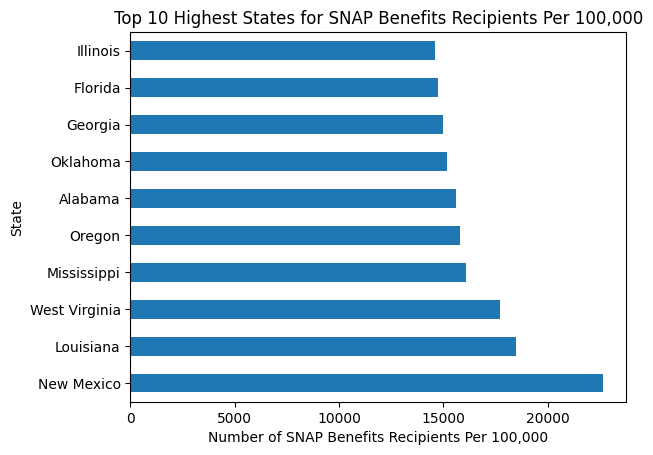

In [246]:
top_10_highest_snap.plot(kind='barh', title='Top 10 Highest States for SNAP Benefits Recipients Per 100,000', xlabel='Number of SNAP Benefits Recipients Per 100,000', ylabel='State')
plt.show()

In [247]:
top_10_lowest_snap=snap_benefits_per_capita_df.mean().round().sort_values(ascending=True).head(10)
top_10_lowest_snap

Wyoming          5104.0
Utah             5746.0
New Hampshire    5956.0
North Dakota     6665.0
Kansas           7366.0
Minnesota        7766.0
Colorado         8317.0
Nebraska         8537.0
Idaho            8660.0
New Jersey       8686.0
dtype: float64

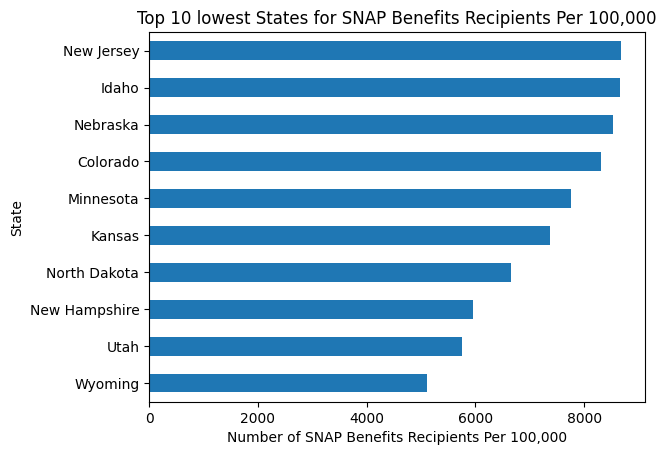

In [248]:
top_10_lowest_snap.plot(kind='barh', title='Top 10 lowest States for SNAP Benefits Recipients Per 100,000', xlabel='Number of SNAP Benefits Recipients Per 100,000', ylabel='State')
plt.show()

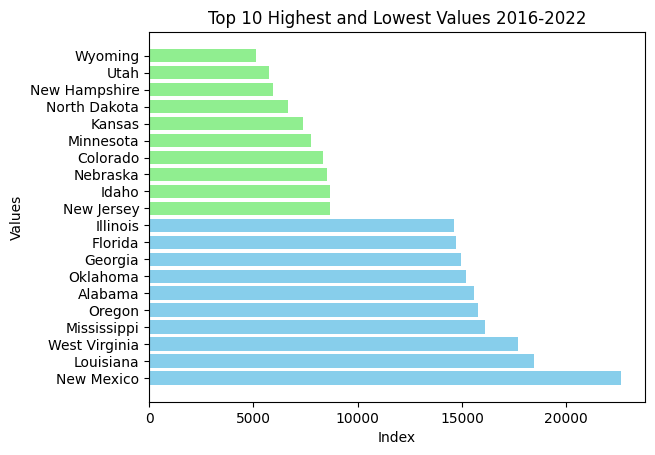

In [249]:
# Combine the two DataFrames
combined_df = pd.concat([top_10_highest_snap, top_10_lowest_snap]).sort_values(ascending=False)

# Plot the bar graph
colors = ['skyblue'] * len(top_10_highest_snap) + ['lightgreen'] * len(top_10_lowest_snap)
plt.barh(combined_df.index, combined_df.values, color=colors)

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Top 10 Highest and Lowest Values 2016-2022')
plt.show()



In [250]:
#grouping car crash data by state and month and then then based on snap data see if there is a difference
grouping_car_crash_data=car_crash_df.groupby(['State','Year-Month']).size().reset_index(name='Number of Car Crashes')

In [251]:
grouped_car_crash_data =grouping_car_crash_data.pivot(index='Year-Month', columns='State', values='Number of Car Crashes')


In [252]:
#trimming data to only include 2016-2022
grouped_car_crash_data = grouped_car_crash_data.loc['2016-01':'2022-01']


In [253]:
#dealing with missing values by filling them with the average of the column
grouped_car_crash_data.fillna(grouped_car_crash_data.mean(), inplace=True)
grouped_car_crash_data

State,CA,CT,FL,GA,IA,IL,IN,MA,MI,MO,NE,NH,NJ,NY,OH,PA,RI,SC,WI,WV
Year-Month,,,,,,,,,,,,,,,,,,,,
2016-02,10483.363636,156.0,3774.125,1437.0,129.181818,1298.0,3.857143,393.666667,1916.25,139.75,536.181818,13.5,251.0,1038.0,423.0,1.0,68.666667,280.375,5.142857,2.0
2016-03,3264.000000,156.0,3774.125,1437.0,9.000000,1298.0,3.857143,393.666667,1916.25,139.75,132.000000,13.5,251.0,1038.0,303.0,1.0,68.666667,280.375,5.142857,2.0
2016-04,11013.000000,156.0,3774.125,1437.0,49.000000,1298.0,3.857143,393.666667,1916.25,139.75,490.000000,13.5,251.0,1038.0,75.4,1.0,68.666667,280.375,5.142857,2.0
2016-05,9185.000000,156.0,3774.125,1437.0,66.000000,1298.0,3.857143,393.666667,1916.25,139.75,552.000000,13.5,251.0,1038.0,75.4,1.0,68.666667,280.375,5.142857,2.0
2016-06,11306.000000,156.0,1296.000,571.0,76.000000,440.0,3.000000,393.666667,562.00,47.00,659.000000,13.5,251.0,1038.0,2.0,1.0,68.666667,131.000,5.142857,2.0
2016-07,10096.000000,156.0,3520.000,1218.0,66.000000,1175.0,3.000000,393.666667,1475.00,124.00,475.000000,13.5,251.0,1038.0,2.0,1.0,68.666667,215.000,8.000000,2.0
2016-08,12899.000000,156.0,4488.000,1486.0,82.000000,1549.0,6.000000,393.666667,2020.00,186.00,701.000000,13.5,251.0,1038.0,3.0,1.0,68.666667,270.000,3.000000,2.0
2016-09,12165.000000,156.0,4176.000,1697.0,167.000000,1501.0,6.000000,393.666667,2200.00,169.00,664.000000,13.5,251.0,1038.0,3.0,1.0,68.666667,334.000,2.000000,2.0
2016-10,11546.000000,156.0,3740.000,1718.0,220.000000,1424.0,2.000000,393.666667,2198.00,142.00,660.000000,13.5,251.0,1038.0,2.0,1.0,68.666667,311.000,2.000000,2.0


In [254]:
grouped_car_crash_data.columns#=new_state_lst

Index(['CA', 'CT', 'FL', 'GA', 'IA', 'IL', 'IN', 'MA', 'MI', 'MO', 'NE', 'NH',
       'NJ', 'NY', 'OH', 'PA', 'RI', 'SC', 'WI', 'WV'],
      dtype='object', name='State')

In [255]:
#combined df has the states we need to extract from grouped_car_crash_data
combined_df = pd.DataFrame(combined_df)

combined_df.reset_index(inplace=True)
combined_df.rename(columns={'index':'State'}, inplace=True)


In [256]:
#understanding what states I need
states_for_analysis=combined_df['State']
states_for_analysis

0        New Mexico
1         Louisiana
2     West Virginia
3       Mississippi
4            Oregon
5           Alabama
6          Oklahoma
7           Georgia
8           Florida
9          Illinois
10       New Jersey
11            Idaho
12         Nebraska
13         Colorado
14        Minnesota
15           Kansas
16     North Dakota
17    New Hampshire
18             Utah
19          Wyoming
Name: State, dtype: object

In [257]:
#with the help of an AI friend, I was able to get the states I needed for my analysis

states_for_analysis = {
    "NM": "New Mexico",
    "LA": "Louisiana",
    "WV": "West Virginia",
    "MS": "Mississippi",
    "OR": "Oregon",
    "AL": "Alabama",
    "OK": "Oklahoma",
    "GA": "Georgia",
    "FL": "Florida",
    "IL": "Illinois",
    "NJ": "New Jersey",
    "ID": "Idaho",
    "NE": "Nebraska",
    "CO": "Colorado",
    "MN": "Minnesota",
    "KS": "Kansas",
    "ND": "North Dakota",
    "NH": "New Hampshire",
    "UT": "Utah",
    "WY": "Wyoming"
}

In [258]:
grouped_car_crash_data = grouped_car_crash_data[states_for_analysis.keys()]

KeyError: "['NM', 'LA', 'MS', 'OR', 'AL', 'OK', 'ID', 'CO', 'MN', 'KS', 'ND', 'UT', 'WY'] not in index"

In [ ]:
grouped_car_crash_data.rename(columns=states_for_analysis, inplace=True)


C:\Users\jkolo\AppData\Local\Temp\ipykernel_1244\3396625573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_car_crash_data.rename(columns=states_for_analysis, inplace=True)


In [ ]:
grouped_car_crash_data.to_csv('grouped_car_crash_data.csv')

In [ ]:
grouped_car_crash_df=pd.read_csv('grouped_car_crash_data.csv')

In [ ]:
#merging grouped_car_crash_df with expanded_df(population data)

grouped_car_crash_df.rename(columns={'Year-Month':'Date'}, inplace=True)
grouped_car_crash_df['Date'] = pd.to_datetime(grouped_car_crash_df['Date']) #converting to datetime

#now the frames are ready to be merged
car_crash_with_pop=pd.merge(grouped_car_crash_df, expanded_df, on='Date', how='inner')

In [ ]:
car_crash_with_pop.head(3)

,Date,New Mexico,Louisiana,West Virginia,Mississippi,Oregon,Alabama,Oklahoma,Georgia,Florida,...,Resident Population in West Virginia,Resident Population in Delaware,Resident Population in Kansas,Resident Population in New Hampshire,Resident Population in Iowa,Resident Population in New Mexico,Resident Population in Montana,Resident Population in Nebraska,Resident Population in Maine,Resident Population in North Dakota
0,2016-01-01,127.544118,1621.776119,92.944444,164.850746,2011.176471,1160.897059,1094.205882,1850.426471,8394.426471,...,1832435.0,949989.0,2912977.0,1343694.0,3133210.0,2092555.0,1042137.0,1906483.0,1332348.0,756114.0
1,2016-02-01,127.544118,1621.776119,32.000000,164.850746,2011.176471,1160.897059,1094.205882,1850.426471,8394.426471,...,1832435.0,949989.0,2912977.0,1343694.0,3133210.0,2092555.0,1042137.0,1906483.0,1332348.0,756114.0
2,2016-03-01,127.544118,1621.776119,34.000000,164.850746,2011.176471,1160.897059,1094.205882,1850.426471,8394.426471,...,1832435.0,949989.0,2912977.0,1343694.0,3133210.0,2092555.0,1042137.0,1906483.0,1332348.0,756114.0


In [ ]:
states_for_analysis.values()

dict_values(['New Mexico', 'Louisiana', 'West Virginia', 'Mississippi', 'Oregon', 'Alabama', 'Oklahoma', 'Georgia', 'Florida', 'Illinois', 'New Jersey', 'Idaho', 'Nebraska', 'Colorado', 'Minnesota', 'Kansas', 'North Dakota', 'New Hampshire', 'Utah', 'Wyoming'])

In [ ]:
# Create an empty dictionary to store the results
car_crashes_per_capita = {}

# Loop through each state
for state in states_for_analysis.values():
    
    # Divide one column by the other
    result = car_crash_with_pop[state] / snap_with_pop['Resident Population in ' + state] 
    
    # Store the result in the dictionary
    car_crashes_per_capita[state] = result


car_crashes_per_capita

{'New Mexico': 0     0.000061
 1     0.000061
 2     0.000061
 3     0.000061
 4     0.000061
         ...   
 68    0.000077
 69    0.000073
 70    0.000072
 71    0.000090
 72    0.000051
 Length: 73, dtype: float64,
 'Louisiana': 0     0.000346
 1     0.000346
 2     0.000346
 3     0.000346
 4     0.000346
         ...   
 68    0.000604
 69    0.000497
 70    0.000609
 71    0.000679
 72    0.000423
 Length: 73, dtype: float64,
 'West Virginia': 0     0.000051
 1     0.000017
 2     0.000019
 3     0.000017
 4     0.000007
         ...   
 68    0.000155
 69    0.000149
 70    0.000161
 71    0.000212
 72    0.000145
 Length: 73, dtype: float64,
 'Mississippi': 0     0.000055
 1     0.000055
 2     0.000055
 3     0.000055
 4     0.000055
         ...   
 68    0.000096
 69    0.000071
 70    0.000097
 71    0.000107
 72    0.000080
 Length: 73, dtype: float64,
 'Oregon': 0     0.000491
 1     0.000491
 2     0.000491
 3     0.000491
 4     0.000491
         ...   
 68    0.000529

In [ ]:
car_crash_df_per_capita_df=pd.DataFrame(car_crashes_per_capita)
car_crash_df_per_capita_df

,New Mexico,Louisiana,West Virginia,Mississippi,Oregon,Alabama,Oklahoma,Georgia,Florida,Illinois,New Jersey,Idaho,Nebraska,Colorado,Minnesota,Kansas,North Dakota,New Hampshire,Utah,Wyoming
0,0.000061,0.000346,0.000051,0.000055,0.000491,0.000239,0.000279,0.000180,0.000407,1.577103e-04,0.000144,0.000068,0.000200,0.000172,3.555259e-04,0.000066,0.000071,1.023770e-04,0.000365,0.000035
1,0.000061,0.000346,0.000017,0.000055,0.000491,0.000239,0.000279,0.000180,0.000407,1.577103e-04,0.000144,0.000068,0.000200,0.000172,3.555259e-04,0.000066,0.000071,1.023770e-04,0.000365,0.000035
2,0.000061,0.000346,0.000019,0.000055,0.000491,0.000239,0.000279,0.000180,0.000407,1.577103e-04,0.000019,0.000068,0.000080,0.000172,5.429510e-07,0.000066,0.000071,7.442171e-07,0.000365,0.000035
3,0.000061,0.000346,0.000017,0.000055,0.000491,0.000239,0.000279,0.000180,0.000407,7.799272e-08,0.000059,0.000068,0.000287,0.000172,7.239347e-07,0.000066,0.000071,1.562856e-05,0.000365,0.000035
4,0.000061,0.000346,0.000007,0.000055,0.000491,0.000239,0.000279,0.000180,0.000407,1.577103e-04,0.000058,0.000068,0.000303,0.000172,1.809837e-07,0.000066,0.000071,5.953736e-06,0.000365,0.000035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.000077,0.000604,0.000155,0.000096,0.000529,0.000358,0.000197,0.000205,0.000883,1.824779e-04,0.000215,0.000123,0.000070,0.000135,4.114527e-04,0.000099,0.000102,5.837817e-05,0.000394,0.000095
69,0.000073,0.000497,0.000149,0.000071,0.000501,0.000309,0.000207,0.000194,0.000927,1.564659e-04,0.000220,0.000083,0.000065,0.000224,4.160049e-04,0.000100,0.000121,5.693673e-05,0.000462,0.000286
70,0.000072,0.000609,0.000161,0.000097,0.000595,0.000405,0.000301,0.000263,0.001143,1.224139e-04,0.000233,0.000121,0.000056,0.000231,4.860394e-04,0.000155,0.000255,9.369336e-05,0.000450,0.000067
71,0.000090,0.000679,0.000212,0.000107,0.001151,0.000402,0.000279,0.000264,0.001212,1.248574e-04,0.000251,0.000289,0.000075,0.000353,9.346104e-04,0.000097,0.000221,1.001798e-04,0.000770,0.000614


In [ ]:
#multiplying by 100,000 to get the number of car crashes per 100,000 people
car_crash_df_per_capita_df = (car_crash_df_per_capita_df * 100000).round()


In [ ]:
car_crash_df_per_capita_df

,New Mexico,Louisiana,West Virginia,Mississippi,Oregon,Alabama,Oklahoma,Georgia,Florida,Illinois,New Jersey,Idaho,Nebraska,Colorado,Minnesota,Kansas,North Dakota,New Hampshire,Utah,Wyoming
0,6.0,35.0,5.0,6.0,49.0,24.0,28.0,18.0,41.0,16.0,14.0,7.0,20.0,17.0,36.0,7.0,7.0,10.0,37.0,3.0
1,6.0,35.0,2.0,6.0,49.0,24.0,28.0,18.0,41.0,16.0,14.0,7.0,20.0,17.0,36.0,7.0,7.0,10.0,37.0,3.0
2,6.0,35.0,2.0,6.0,49.0,24.0,28.0,18.0,41.0,16.0,2.0,7.0,8.0,17.0,0.0,7.0,7.0,0.0,37.0,3.0
3,6.0,35.0,2.0,6.0,49.0,24.0,28.0,18.0,41.0,0.0,6.0,7.0,29.0,17.0,0.0,7.0,7.0,2.0,37.0,3.0
4,6.0,35.0,1.0,6.0,49.0,24.0,28.0,18.0,41.0,16.0,6.0,7.0,30.0,17.0,0.0,7.0,7.0,1.0,37.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,8.0,60.0,15.0,10.0,53.0,36.0,20.0,21.0,88.0,18.0,21.0,12.0,7.0,13.0,41.0,10.0,10.0,6.0,39.0,9.0
69,7.0,50.0,15.0,7.0,50.0,31.0,21.0,19.0,93.0,16.0,22.0,8.0,6.0,22.0,42.0,10.0,12.0,6.0,46.0,29.0
70,7.0,61.0,16.0,10.0,60.0,41.0,30.0,26.0,114.0,12.0,23.0,12.0,6.0,23.0,49.0,15.0,25.0,9.0,45.0,7.0
71,9.0,68.0,21.0,11.0,115.0,40.0,28.0,26.0,121.0,12.0,25.0,29.0,7.0,35.0,93.0,10.0,22.0,10.0,77.0,61.0


In [ ]:
#getting the specific states that belonged to the top 10 highest and lowest snap benefits per capita
group_1_highest_states=pd.DataFrame(top_10_highest_snap)
group_1_highest_states=group_1_highest_states.index.to_list()

group_2_lowest_states=pd.DataFrame(top_10_lowest_snap)
group_2_lowest_states=group_2_lowest_states.index.to_list()

In [ ]:
top_10_highest_snap=snap_benefits_per_capita_df.mean().round().sort_values(ascending=False).head(10)

In [ ]:
#we now have the car crash data per 100,000 people
#we now need to plot the 10 highest and 10 lowest from our snap data
group_1_car_crashes=car_crash_df_per_capita_df[group_1_highest_states].mean().round().sort_values(ascending=False).head(10)
group_2_car_crashes=car_crash_df_per_capita_df[group_2_lowest_states].mean().round().sort_values(ascending=False).head(10)

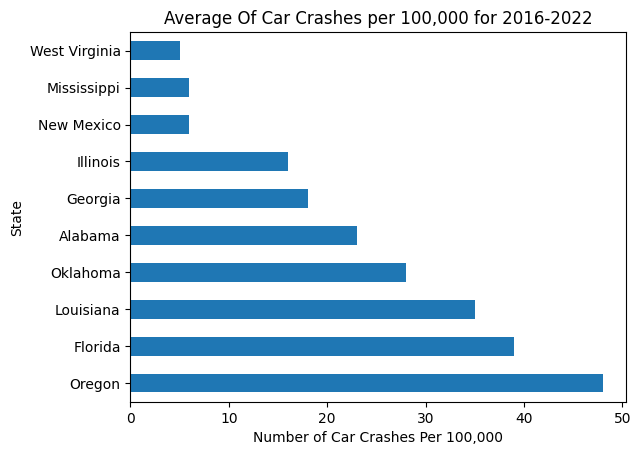

In [ ]:
group_1_car_crashes.plot(kind='barh', title='Average Of Car Crashes per 100,000 for 2016-2022', xlabel='Number of Car Crashes Per 100,000', ylabel='State')
plt.show()

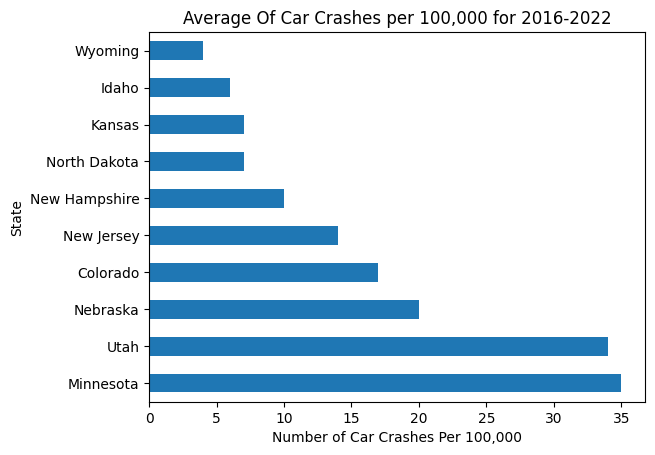

In [ ]:
group_2_car_crashes.plot(kind='barh', title='Average Of Car Crashes per 100,000 for 2016-2022', xlabel='Number of Car Crashes Per 100,000', ylabel='State')
plt.show()

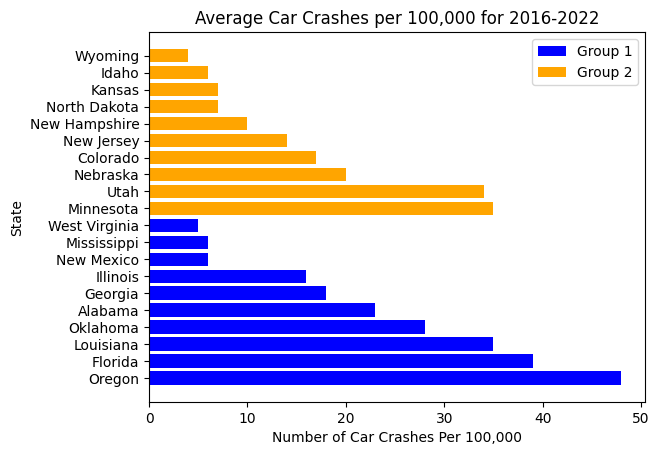

In [ ]:

plt.barh(group_1_car_crashes.index, group_1_car_crashes.values, color='blue', label='Group 1')
plt.barh(group_2_car_crashes.index, group_2_car_crashes.values, color='orange', label='Group 2')

plt.xlabel('Number of Car Crashes Per 100,000')
plt.ylabel('State')
plt.title('Average Car Crashes per 100,000 for 2016-2022')

plt.legend()



plt.show()


In [ ]:
#now lets conduct a correlation test to see if there is a correlation between the two state groups
#we will be using pearson correlation test


#first lets retrieve our data
#from car_crash_df_per_capita_df
group_1_car_crashes_data=car_crash_df_per_capita_df[group_1_highest_states]
group_1_car_crashes_data

group_2_car_crashes_data=car_crash_df_per_capita_df[group_2_lowest_states]
group_2_car_crashes_data

#gathering data from 


,Wyoming,Utah,New Hampshire,North Dakota,Kansas,Minnesota,Colorado,Nebraska,Idaho,New Jersey
0,3.0,37.0,10.0,7.0,7.0,36.0,17.0,20.0,7.0,14.0
1,3.0,37.0,10.0,7.0,7.0,36.0,17.0,20.0,7.0,14.0
2,3.0,37.0,0.0,7.0,7.0,0.0,17.0,8.0,7.0,2.0
3,3.0,37.0,2.0,7.0,7.0,0.0,17.0,29.0,7.0,6.0
4,3.0,37.0,1.0,7.0,7.0,0.0,17.0,30.0,7.0,6.0
...,...,...,...,...,...,...,...,...,...,...
68,9.0,39.0,6.0,10.0,10.0,41.0,13.0,7.0,12.0,21.0
69,29.0,46.0,6.0,12.0,10.0,42.0,22.0,6.0,8.0,22.0
70,7.0,45.0,9.0,25.0,15.0,49.0,23.0,6.0,12.0,23.0
71,61.0,77.0,10.0,22.0,10.0,93.0,35.0,7.0,29.0,25.0


In [ ]:
#now for snap_data_per_capita_df
group_1_highest_snap_data=snap_benefits_per_capita_df[group_1_highest_states]
group_1_highest_snap_data

group_2_lowest_snap_data=snap_benefits_per_capita_df[group_2_lowest_states]
group_2_lowest_snap_data

,Wyoming,Utah,New Hampshire,North Dakota,Kansas,Minnesota,Colorado,Nebraska,Idaho,New Jersey
0,5838.0,7274.0,7440.0,7158.0,8851.0,8745.0,8662.0,9252.0,11417.0,10010.0
1,5878.0,7283.0,7401.0,7194.0,8786.0,8699.0,8629.0,9204.0,11329.0,9970.0
2,5931.0,7327.0,7404.0,7211.0,8692.0,8740.0,8618.0,9203.0,11213.0,9983.0
3,5867.0,7291.0,7327.0,7228.0,8637.0,8671.0,8572.0,9149.0,11081.0,9931.0
4,5820.0,7240.0,7262.0,7213.0,8580.0,8669.0,8544.0,9129.0,10902.0,9820.0
...,...,...,...,...,...,...,...,...,...,...
68,5148.0,4897.0,4967.0,6315.0,6705.0,7616.0,9236.0,7871.0,6661.0,9516.0
69,5190.0,4726.0,4958.0,6270.0,6712.0,7590.0,8689.0,7947.0,6623.0,9648.0
70,5241.0,4663.0,4963.0,6270.0,6656.0,7542.0,8823.0,7935.0,6576.0,9644.0
71,5215.0,4717.0,4963.0,6251.0,6658.0,7419.0,9633.0,7946.0,6618.0,9722.0


In [ ]:
group_1_car_crashes_data.corrwith(group_1_highest_snap_data, axis=0, method='pearson')

New Mexico       0.211557
Louisiana       -0.253825
West Virginia   -0.378768
Mississippi     -0.453110
Oregon          -0.431774
Alabama         -0.643895
Oklahoma        -0.600558
Georgia         -0.062643
Florida          0.139036
Illinois         0.366939
dtype: float64

In [ ]:
group_2_car_crashes_data.corrwith(group_2_lowest_snap_data, axis=0, method='pearson')

Wyoming          0.060882
Utah            -0.609518
New Hampshire   -0.089640
North Dakota    -0.217168
Kansas          -0.317089
Minnesota       -0.454836
Colorado        -0.268583
Nebraska         0.783219
Idaho           -0.480859
New Jersey       0.054768
dtype: float64

In [ ]:
car_crash_df_per_capita_df.flatten().corr(snap_benefits_per_capita_df.flatten())

AttributeError: 'DataFrame' object has no attribute 'flatten'

In [ ]:
test=car_crash_df_per_capita_df.values.flatten()


In [ ]:
test1=snap_benefits_per_capita_df.values.flatten()

In [ ]:
test1.corrwith(test, axis=0, method='pearson')

AttributeError: 'numpy.ndarray' object has no attribute 'corrwith'

In [ ]:
#two samplemm t -test between california and connecticut car accidents
#word cloud of most common words in description


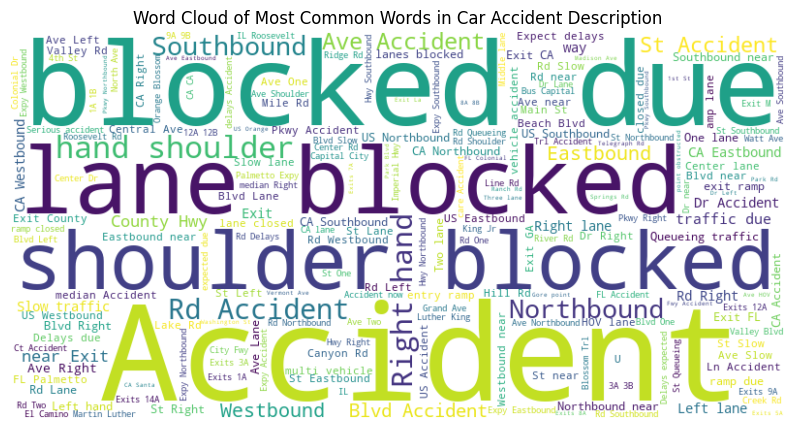

In [260]:
#wordcloud of most common words in description
# pd.set_option('display.max_colwidth', None) #helping me visualize the description column
#fix word cloud becuase it buggs with lots of data

car_crash_df['Description']

# Concatenate all the descriptions into a single string
text = ' '.join(car_crash_df['Description'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Car Accident Description')
plt.show()


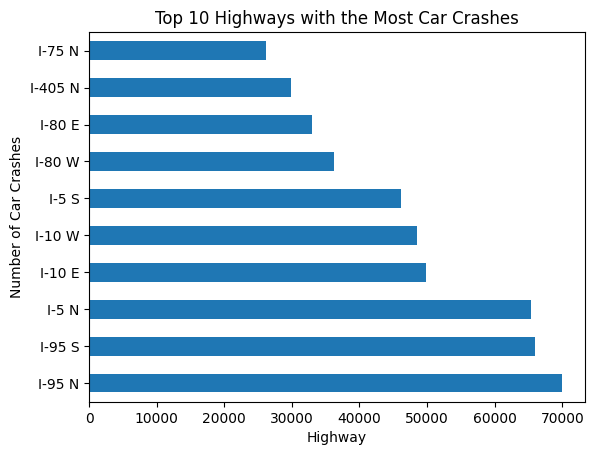

In [ ]:
car_crash_df['Street'].value_counts().head(10).plot(kind='barh')
plt.xlabel('Highway')
plt.ylabel('Number of Car Crashes')
plt.title("Top 10 Highways with the Most Car Crashes")
plt.show()


In [ ]:
#need to do t-test between I-5 S and I-5 N


# Speed Bumps
![Speed Bump Picture, Credits: https://www.speedbumpsandhumps.com/?utm_source=bing&utm_medium=cpc&utm_campaign=SBH-Brand&utm_term=%20speed%20%20bumps%20%20&%20%20speed%20%20humps&mkwid=y9DUirWV&pcrid=&plc=&pkw=%20speed%20%20bumps%20%20&%20%20speed%20%20humps&pmt=&cvosrc=ppc.bing.%20speed%20%20bumps%20%20&%20%20speed%20%20humps&utm_adgroup=BMM&st-t=sbhbingbrnd&msclkid=c4825a6262df1a1e6dd23f1f5dc69a30&utm_content=BMM](https://media.istockphoto.com/photos/speed-bump-picture-id538561431?k=6&m=538561431&s=612x612&w=0&h=1zKikb-BnoU_m7oCVPp60WooGgVj3D5Xv3BLkq9C7bY=)
### We all hate them, but do they help reduce car accidents?


In [ ]:
print('Car accidents that occurred with and without nearby speed bumps')
raw_bump_data = car_crash_df["Bump"].value_counts()
total_accidents = len(car_crash_df)
bump_percentages = raw_bump_data / total_accidents * 100

print("(Speed Bump):", raw_bump_data.iloc[1], f"({bump_percentages.iloc[1]:.2f})%")
print("(No Speed Bump):", raw_bump_data.iloc[0], f"({bump_percentages.iloc[0]:.2f})%")


Car accidents that occurred with and without nearby speed bumps
(Speed Bump): 3067 (0.04)%
(No Speed Bump): 6882270 (99.96)%


In [ ]:
#further investigation into speed bumps and car accidents
car_crashes_with_bumps = car_crash_df[car_crash_df["Bump"] == True]

In [ ]:
#plotting interactive map of car crashes with speed bumps
interactive_graph=px.scatter_mapbox(car_crashes_with_bumps,
                    lat="Start_Lat",
                    lon="Start_Lng",
                    color="Severity",
                    zoom=3,
                    hover_name="City",
                    hover_data=["State","Temperature(F)","Visibility(mi)"],
                    title="US Accidents with Speed Bumps Nearby")
interactive_graph.update_layout(mapbox_style="open-street-map")
interactive_graph.show()

In [ ]:
car_crashes_with_bumps["Severity"].value_counts()

Severity
2    1012
3     261
1      16
4       1
Name: count, dtype: int64

In [ ]:
# t-test of if severity of car accidents severity is affected by speed bumps

In [ ]:
#graphing car crashes with speed bumps by weather patterns

In [ ]:
car_crashes_with_bumps["Weather_Condition"].value_counts()

Weather_Condition
Clear               31
Mostly Cloudy       10
Overcast             7
Partly Cloudy        5
Scattered Clouds     3
Light Rain           1
Name: count, dtype: int64

In [ ]:
#do analysis on weather patterns and car accidents (correlation test)

In [ ]:
#more analysis on car crashes with speed bumps with weather patterns 

# Dataset Citation

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.